# **Final Report** #

## **Decoding Health Insurance:** *A Study of Key Cost Influencers* ##

## **Introduction** ##

Understanding the factors that influence annual health insurance charges is a crucial aspect of healthcare economics. Health insurance is vital for mitigating the financial risks associated with illness and ensuring access to healthcare. However, the cost of insurance is influenced by a myriad of personal and geographic factors, making the dynamics of insurance charges complex and multifaceted. This complexity has been the subject of extensive research, contributing to a rich body of literature that explores the various determinants of health insurance premiums.

#### **Research Questions** ####

This study aims to examine the following questions:

1) ***How do individual characteristics like age, gender, BMI, number of children, and smoking status, along with geographic factors, impact annual health insurance charges?***

2) ***Can we develop a predictive model that accurately forecasts these charges based on the aforementioned factors?***

Our study will add to related current existing literature, specifically two significant scientific studies  have delved into these areas:

1. A study titled "Increasing health insurance costs and the decline in insurance coverage" explores the effect of rising health insurance premiums on coverage rates. This research used probit regression and instrumental variable techniques to estimate the association between rising local health insurance costs and the falling propensity for individuals to have any health insurance coverage, considering a variety of economic, demographic, and policy covariates: https://pubmed.ncbi.nlm.nih.gov/16033490/

2. Another important study, "Factors Associated With Increases in US Health Care Spending, 1996-2013," examines the relationship between changes in population size and age structure and spending growth. This study used a five-factor decomposition method to analyze the relative effect of various factors on changes in health spending from 1996-2013: https://jamanetwork.com/journals/jama/fullarticle/2661579

By integrating insights from these studies, our research will contribute to a better understanding of the dynamics of healthcare insurance costs and the factors influencing them.

To address these questions, we will utilize a dataset sourced from Kaggle, created by Arun Jangir and analyzed by Willian Oliveira. This dataset comprises real-world data collected from direct conversations with individuals in hospitals and through the examination of online hospital data regarding insurance on a global scale. It is a comprehensive resource that reflects actual scenarios and cases in the healthcare insurance domain, ensuring real-world applicability. It can be accessed via Kaggle: [Kaggle Dataset](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). 

This data, available under the CC0: Public Domain license, follows a comprehensive methodology: *reading, writing, downloading, analyzing, and discussing*. Its DOI, 10.34740/kaggle/dsv/6678394, ensures easy web access and it's slated for annual updates. Downloaded as a ```.csv``` file, the dataset is complete without missing values, pending further analysis. A descriptive overview is provided in the linked GitHub repository.

https://github.com/PUSH-YA/Health_insurance_stat_modelling/blob/main/insurance.csv

## **Methods and Results** ##

#### **a) Exploratory Data Analysis (EDA)** ####

In [1]:
library(dplyr) # data wrangling
library(ggplot2) # data visualisation
library(tidyverse) # data wrangling & tidy
library(gridExtra) # grid visualisation
library(glmnet) # for lasso selection
library(car) # for vif
library(broom) # tidy() results



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching core tidyverse packages ---------------------------------------------------------------- tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
v readr     2.1.4     
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, 

In [2]:
url_path <- "https://raw.githubusercontent.com/PUSH-YA/Health_insurance_stat_modelling/main/insurance.csv"
insurance_data <- read.csv(url_path)
tail(insurance_data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1333,52,female,44.70,3,no,southwest,11411.685
1334,50,male,30.97,3,no,northwest,10600.548
1335,18,female,31.92,0,no,northeast,2205.981
1336,18,female,36.85,0,no,southeast,1629.833
1337,21,female,25.80,0,no,southwest,2007.945
1338,61,female,29.07,0,yes,northwest,29141.360


In [3]:
str(insurance_data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


- **Number of Observations:** ``insurance.csv``  consists of 1338 rows, indicating individual insurance instances.
- **Number of Variables:** 7 columns, each representing distinct attributes.

| Variable  | Type                   | Description                                                                                   |
|-----------|------------------------|-----------------------------------------------------------------------------------------------|
| age       | Numeric (Integer)      | The age of the insured individual.                                                            |
| sex       | Categorical (String)   | The gender of the insured. ("male" or "female")                                               |
| bmi       | Numeric (Float)        | Body Mass Index, a value derived from the height and weight of an individual, indicating body fat. |
| children  | Numeric (Integer)      | The number of children/dependents covered by the insurance policy.                            |
| smoker    | Categorical (String)   | Indicates whether the insured person is a smoker. ("yes" or "no")                             |
| region    | Categorical (String)   | The geographic area where the insurance coverage applies. One of four: *Northeast, Southeast, Northwest, Southwest* |
| charges   | Numeric (Float)        | Annual health insurance charges for the insured individual.                                                |

There are no missing values or duplicate rows in the  dataset. We must transform this data is to convert all variables that were character into factors for better EDA and to be used as categorical variables in future model assessment. This includes the following variables: sex, smoker, region.

In [4]:
# Convert character columns to factors
insurance_data$sex <- as.factor(insurance_data$sex)
insurance_data$smoker <- as.factor(insurance_data$smoker)
insurance_data$region <- as.factor(insurance_data$region)
str(insurance_data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 2 2 2 1 1 1 2 1 ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : Factor w/ 2 levels "no","yes": 2 1 1 1 1 1 1 1 1 1 ...
 $ region  : Factor w/ 4 levels "northeast","northwest",..: 4 3 3 2 2 3 3 2 1 2 ...
 $ charges : num  16885 1726 4449 21984 3867 ...


We will now visualise the data where the categorical data (or that data that can be represented as categories) is represented with boxplots and the numerical data is represented with scatterplots. There was an analysis done on the numerical data and `smoker` seemed to be the confoduning factor present in them and as such has been highlighted in the graph.

Warning message in geom_smooth(method = "lm", conf.int = TRUE):
"Ignoring unknown parameters: `conf.int`"
Warning message in geom_smooth(method = "lm", conf.int = TRUE):
"Ignoring unknown parameters: `conf.int`"
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


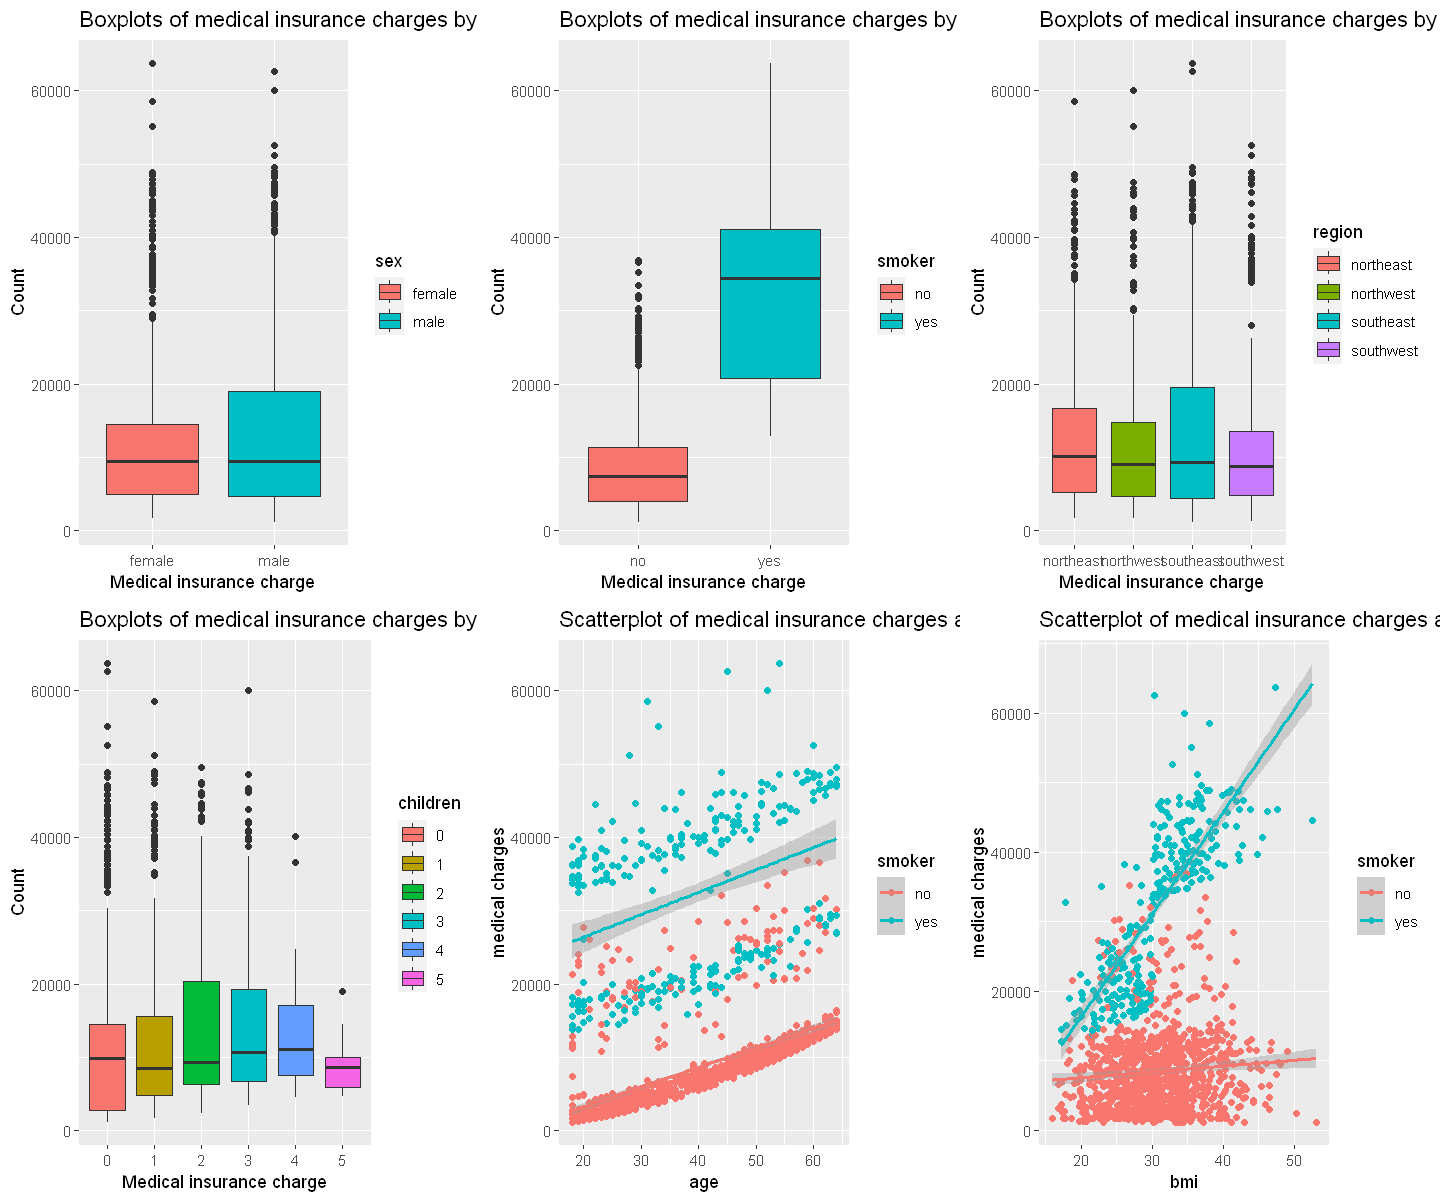

In [5]:
options(repr.plot.height = 10, repr.plot.width =12)

## BOX PLOTS OF DIFFERENT  MEDICAL CHARGES BY SEX, SMOKER AND REGION (IN THAT ORDER)
categorical_data <- insurance_data %>% mutate(children = as.factor(children)) 
categorical_vars <- c('sex', 'smoker', 'region', 'children')
plots <- list()
for(var in categorical_vars)
    {
    plots[[var]] <- ggplot(categorical_data, aes(x = .data[[var]], fill = .data[[var]], y = charges)) +
          geom_boxplot() +
          labs(
            title = paste("Boxplots of medical insurance charges by ", var),
            x = "Medical insurance charge",
            y = "Count"
          )
}
## SCATTER PLOTS OF DIFFERENT  MEDICAL CHARGES BY SEX, SMOKER AND REGION (IN THAT ORDER)
numerical_vars <- c('age', 'bmi')
numerical_scatter <- list()
for(var in numerical_vars)
    {
    plots[[var]] <- ggplot(insurance_data, aes(x = .data[[var]], y = charges, color = .data[["smoker"]])) +
          geom_point() +
        geom_smooth(method = 'lm', conf.int = TRUE) + 
          labs(
            title = paste("Scatterplot of medical insurance charges against ", var),
            x = var,
            y = "medical charges"
          )
}
grid.arrange(grobs = plots, ncol = 3)

Based on the preliminary analysis of our graphs, we've chosen to include all variables in our study. The 'children' variable, showing no clear pattern, will be converted into a binary feature to indicate presence (1) or absence (0) of children. 

The values for the Northeast and Southeast are marginally higher compared to those for the Northwest and Southwest, so to better capture regional influences the 'region' variable will be simplified into two categories: "East" (Northeast and Southeast) and "West" (Northwest and Southwest).

We will now convert the following categories into 1 and 0: `region == West` to 1 and `region == East` to 0 as well as convert `smoker==yes` to 1 and `smoker==no` to 0. Similarily will also convert `sex == male` to 1 and `sex==female` to 0.

In [6]:
insurance_data$children <- as.numeric(as.character(insurance_data$children))
insurance_data$children <- ifelse(insurance_data$children > 0, 1, 0) # presence of children as 1
insurance_data$smoker <- ifelse(insurance_data$smoker == "yes", 1, 0) # smoker yes as 1
insurance_data$sex <- ifelse(insurance_data$sex == "male", 1, 0) # male as 1, female as 0

In [7]:
insurance_data$region <- ifelse(insurance_data$region %in% c("southeast", "northeast"), "East", "West") %>% as.factor()
insurance_data$region <- ifelse(insurance_data$region == "West", 1, 0)

In [8]:
head(insurance_data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,0,27.900,0,1,1,16884.924
2,18,1,33.770,1,0,0,1725.552
3,28,1,33.000,1,0,0,4449.462
4,33,1,22.705,0,0,1,21984.471
5,32,1,28.880,0,0,1,3866.855
6,31,0,25.740,0,0,0,3756.622


#### **b) Methods: Plan** ####

We will perform multiple linear regression on the data. This means we will have the following assumptions:
1. We assume linearity present in the data which is checked with visualisation and does seem to hold (Assignment 2).
2. We assume that each residual is independent of the other one
3. We assume that the conditional distribution of the residuals is normal which can be checked using the QQ plot of variables.
4. We also assume homoscedasticity in residuals which can be checked using the residuals fitted plot
5. We assume that there is no multi-collinearity present in the dataset. However, it may be redundant as we are already using regularisation to already check for relevant features.

We will use a regularisation, specifically Lasso, for selecting the model and then perform statistical inference on the model. Lasso regularisation is preferred over forward selection and Ridge as it will consider all of the variables at once and only keep the relevant features and remove the irrelevant ones (0 coefficient ones). We are not using forward selection because there will be a lot of dummy variables resulting in $n << p$ where $n$ is variables and $p$ is parameters in the model and all the variables have to be considered together. There will be bias involved in the coefficients due to the regularisation and thus, `lasso_data` will be used to select the variables and `inference_data` will be used to fit the least squares method. $F-test$ will be performed on the inference model against the full model and the intercept-only model as a sanity check to ensure the selected variables are statistically significant.

First we will start by splitting the data

In [9]:
set.seed(2401)

nrows <- nrow(insurance_data) # number rows

# data is shuffled to ensure independence between examples 
shuffled_data <- insurance_data[sample(1:nrows),]

# Split the data into lasso and inference
lasso_data <- shuffled_data %>% sample_frac(0.5)
inference_data <- shuffled_data %>% setdiff(lasso_data)
print(head(lasso_data))
head(inference_data)

  age sex    bmi children smoker region   charges
1  54   0 32.300        1      0      0 11512.405
2  22   1 32.110        0      0      1  2055.325
3  36   1 34.430        1      0      0  5584.306
4  27   0 20.045        1      1      1 16420.495
5  55   1 30.685        0      1      0 42303.692
6  39   1 24.510        1      0      1  6710.192


,age,sex,bmi,children,smoker,region,charges
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,1,28.690,1,0,1,10264.442
2,45,1,30.495,1,0,1,8413.463
3,63,1,39.800,1,0,1,15170.069
4,23,0,32.780,1,1,0,36021.011
5,28,0,23.845,1,0,1,4719.737
6,18,1,31.680,1,1,0,34303.167


Now we will perform cross validation to use $\lambda_{min}$ value that gives the lowest $MSE$ value for evaluating the model as it would provide the model that yields the lowest squared residuals. Then the Coefficients of the models are selected and $VIF$ among the selected variables is checked to ensure that there is no multicollinearity.

In [10]:
lasso_model <-
    cv.glmnet(x = lasso_data %>% select(-charges) %>% as.matrix(), 
              y = lasso_data$charges %>% as.matrix(), 
              alpha = 1)
lasso_model

beta_lasso <- coef(lasso_model, s = "lambda.min")


lasso_selected_covariates <- as_tibble(
        as.matrix(beta_lasso),
        rownames='covariate') %>%
        filter(covariate != '(Intercept)' & abs(s1) !=0) %>%
        pull(covariate)

lasso_selected_covariates


Call:  cv.glmnet(x = lasso_data %>% select(-charges) %>% as.matrix(),      y = lasso_data$charges %>% as.matrix(), alpha = 1) 

Measure: Mean-Squared Error 

    Lambda Index  Measure      SE Nonzero
min  107.7    49 39226499 3840586       4
1se 1102.8    24 42981516 4956361       3

[1] "age"      "bmi"      "children" "smoker"

In [11]:
vif(lm(charges ~ ., select(lasso_data, lasso_selected_covariates, charges)))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(lasso_selected_covariates)

  # Now:
  data %>% select(all_of(lasso_selected_covariates))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


age      bmi children   smoker 
1.013654 1.011717 1.001903 1.000881

Based on the $VIF$ above, there does not seem to be presence of multicollinearity among any of the covariates present above. It does seem that Lasso selection ensured that there were no irrelevant or collinear factors (if there were).

We will now use `lasso_selected_covariates` to make a multiple linear regression model with interaction parameters. Finally we will perform the inference on the model using `tidy`.

In [12]:
# make linear regression model -> perform anove  with full model -> do tidy for inference.
inference_data <- inference_data %>% select(lasso_selected_covariates, charges)
head(inference_data)

,age,bmi,children,smoker,charges
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,49,28.690,1,0,10264.442
2,45,30.495,1,0,8413.463
3,63,39.800,1,0,15170.069
4,23,32.780,1,1,36021.011
5,28,23.845,1,0,4719.737
6,18,31.680,1,1,34303.167


In [13]:
# Perform linear regression
linear_model <- lm(charges ~ ., data = inference_data)

# Display summary of the linear regression
summary(linear_model)
tidy(linear_model, conf.int = TRUE)


Call:
lm(formula = charges ~ ., data = inference_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12117.3  -2836.5   -823.1   1671.9  29543.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -11826.29    1303.55  -9.072   <2e-16 ***
age            251.04      16.57  15.154   <2e-16 ***
bmi            317.66      37.54   8.461   <2e-16 ***
children       856.86     467.54   1.833   0.0673 .  
smoker       23934.86     562.77  42.530   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5949 on 664 degrees of freedom
Multiple R-squared:  0.7611,	Adjusted R-squared:  0.7597 
F-statistic: 528.9 on 4 and 664 DF,  p-value: < 2.2e-16


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-11826.2901,1303.55060,-9.072367,1.304197e-18,-14385.86786,-9266.7123
age,251.0450,16.56670,15.153593,9.101212e-45,218.51554,283.5744
bmi,317.6581,37.54383,8.460994,1.689501e-16,243.93916,391.3770
children,856.8581,467.54240,1.832685,6.729701e-02,-61.18156,1774.8977
smoker,23934.8593,562.76963,42.530474,9.484241e-192,22829.83690,25039.8817


The analysis of the linear regression model on the designated variables—age, BMI, children, and smoking status—reveals an adjusted R-squared value of 0.7597. This metric, indicative of the proportion of explained variance in the response variable, demonstrates a noteworthy level of model fit. The selected predictors, age, BMI, children, and smoking status, collectively contribute to explaining approximately 75.97% of the variability observed in the inference_data.

It is essential to exercise caution and recognize potential limitations in the evaluation process. The dataset was partitioned into training and testing sets using a 50% split. While this approach facilitates model validation, it introduces an element of randomness that may influence the performance metrics. Consequently, the robustness of the model's generalization to unseen data should be considered with prudence, recognizing the stochastic nature inherent in the data splitting methodology. This acknowledgment serves as a crucial element in the interpretation of the model's overall reliability and underscores the importance of further validation techniques to fortify the findings.

## **Discussion** ##

- **Summary of Key Findings**: 

    Our comprehensive analysis underscores the multifaceted nature of health insurance charges. Beyond the primary factors of age, BMI, smoking status, number of children, and geographic location, we observed intricate interplays between these elements. For instance, the escalation of insurance costs with age is not only a reflection of increasing health risks but also possibly indicative of cumulative lifestyle impacts. Similarly, the influence of geographic factors extends beyond mere location, hinting at systemic disparities in healthcare access and quality.

- **Interpretation and Implications**: 

    The strong correlation between age and insurance charges underscores the increased healthcare needs and risks associated with aging. This finding aligns with existing healthcare literature and emphasizes the importance of age-based considerations in health insurance policymaking. According to our model, on average the increase in age by 1 year increases the charges by approximately USD 251. Similarly, the association between high BMI and increased charges reflects the well-documented health risks of obesity, suggesting that public health initiatives aimed at managing weight could have significant implications for health insurance economics. Based on our model, an increase in bmi by 1 unit increases the insurance charges by approximately USD 317.

    The influence of smoking status on insurance charges is particularly striking as on average being a smoker increases the price of insurance charges by approximately USD 24000. This underscores the long-term financial impact of smoking on individuals and healthcare systems, reinforcing the need for robust anti-smoking campaigns and support programs for smoking cessation.
    
    There is a large impact from having children on the monthly insurance charges however, based on the $t$-test above, the presence of children in the family is not statistically significant in determining the annual insurance charges. This also makes sense when looking at the visualisation as there did not seem to be much difference between the mean of the insurance with 0 children and the rest of the children
    
- **Model Assessment and Limitations**: 

    While our model provides valuable insights, it is important to recognize its limitations. The exclusion of factors such as pre-existing health conditions, detailed lifestyle choices, and income levels means that our analysis may not fully capture the complexity of health insurance pricing. Additionally, the model's reliance on the dataset's specific demographic distribution may limit its applicability to broader populations. 
    Our current model selection only used binary categorisation but in future methods we can use `Grouped-Lasso` or other methods for incorporating all the factors in our categorical variables to understand the impact of each of the factors in detail. 
    Our research also had assumptions associated with Linear regression, we can do a comprehensive analysis of the assumptions present and use models and techniques to address them properly. Currently only the multicollinearity among the variables was tested.
    
- **Future Research Directions**: 

    Future studies could enhance our understanding by integrating additional variables like lifestyle habits, mental health status, and detailed income information. Investigating the impact of health insurance policies and healthcare accessibility in different regions could also yield valuable insights. Additionally, applying machine learning algorithms could uncover more complex relationships within the data.
    
- **Concluding Thoughts**: 

    In conclusion, our study provides a comprehensive overview of factors influencing health insurance charges. The findings offer valuable insights for policymakers, insurance companies, and individuals, highlighting key areas for intervention and improvement. Our study serves as a foundation for further research in this vital aspect of public health and economics.

## **References** ##  

Chernew M, Cutler DM, Keenan PS. "Increasing health insurance costs and the decline in insurance coverage." Health Serv Res. 2005 Aug;40(4):1021-39. doi: 10.1111/j.1475-6773.2005.00409.x. PMID: 16033490; PMCID: PMC1361195.

Dieleman JL, Squires E, Bui AL, et al. "Factors Associated With Increases in US Health Care Spending, 1996-2013." JAMA. 2017;318(17):1668–1678. doi:10.1001/jama.2017.15927.
